# EDA on the training data

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")
%matplotlib inline
%run -i ./Data_Processing/feature_info.py

<Figure size 640x480 with 0 Axes>

In [2]:
training_data = pd.read_csv('./Datasets/training_data_full.csv')

## Total population represented in this dataset:

In [3]:
population_represented = training_data['Population_2017'].sum()
print(f'{round(population_represented / 10**6, 2)} million people represented')

102.05 million people represented


# Distribution of the target variable

In [4]:
training_data.head(3)

,StateAbbr,StateDesc,CityName,CountyFIPS,CityFIPS,TractFIPS,Population_2017,Unemployment_change_rate,Unemployment_rate_2017,Unemployment_rate_2016,...,HIGHCHOL_2017,CSMOKING_2017,BINGE_2017,ARTHRITIS_2017,ACCESS2_2017,BPHIGH_2017,PHLTH_2017,DIABETES_2017,DIABETES_2020,diabetes_change_rate
0,AL,Alabama,Birmingham,1073,107000,1073000100,3042,-0.22807,4.4,5.7,...,35.3,27.9,10.3,31.2,24.4,47.7,20.5,17.4,19.1,0.097701
1,AL,Alabama,Birmingham,1073,107000,1073000300,2735,-0.22807,4.4,5.7,...,36.8,29.3,10.5,30.5,30.4,48.2,22.2,19.8,21.8,0.101010
2,AL,Alabama,Birmingham,1073,107000,1073000400,3338,-0.22807,4.4,5.7,...,35.6,25.9,10.4,31.5,24.7,49.1,19.4,18.4,18.9,0.027174


#### Seems like a pretty big spread of the target variable. A lot of tracts stayed around the same, whiel some changed pretty dramatically

Text(-3.8055555555555554, 0.5, 'Number of Census Tracts')

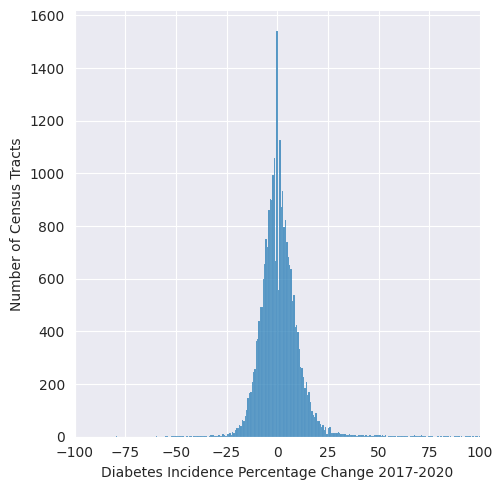

In [5]:
sns.displot(100 * training_data['diabetes_change_rate'])
plt.xlim([-100,100])
plt.xlabel('Diabetes Incidence Percentage Change 2017-2020')
plt.ylabel('Number of Census Tracts')

In [6]:
training_data

,StateAbbr,StateDesc,CityName,CountyFIPS,CityFIPS,TractFIPS,Population_2017,Unemployment_change_rate,Unemployment_rate_2017,Unemployment_rate_2016,...,HIGHCHOL_2017,CSMOKING_2017,BINGE_2017,ARTHRITIS_2017,ACCESS2_2017,BPHIGH_2017,PHLTH_2017,DIABETES_2017,DIABETES_2020,diabetes_change_rate
0,AL,Alabama,Birmingham,1073,107000,1073000100,3042,-0.228070,4.4,5.7,...,35.3,27.9,10.3,31.2,24.4,47.7,20.5,17.4,19.1,0.097701
1,AL,Alabama,Birmingham,1073,107000,1073000300,2735,-0.228070,4.4,5.7,...,36.8,29.3,10.5,30.5,30.4,48.2,22.2,19.8,21.8,0.101010
2,AL,Alabama,Birmingham,1073,107000,1073000400,3338,-0.228070,4.4,5.7,...,35.6,25.9,10.4,31.5,24.7,49.1,19.4,18.4,18.9,0.027174
3,AL,Alabama,Birmingham,1073,107000,1073000500,2864,-0.228070,4.4,5.7,...,38.4,26.3,9.1,35.0,25.2,54.1,21.7,22.4,23.7,0.058036
4,AL,Alabama,Birmingham,1073,107000,1073000700,2577,-0.228070,4.4,5.7,...,39.0,30.9,7.6,36.3,29.0,56.5,25.5,25.0,24.7,-0.012000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26873,WY,Wyoming,Cheyenne,56021,5613900,56021001401,3961,-0.095238,3.8,4.2,...,30.5,18.0,17.9,22.9,14.7,29.0,10.4,8.1,7.8,-0.037037
26874,WY,Wyoming,Cheyenne,56021,5613900,56021001402,1913,-0.095238,3.8,4.2,...,32.5,14.2,15.1,27.3,13.6,33.1,10.5,8.8,9.4,0.068182
26875,WY,Wyoming,Cheyenne,56021,5613900,56021001501,3312,-0.095238,3.8,4.2,...,29.1,17.4,18.4,22.0,14.5,27.8,9.6,7.4,7.7,0.040541
26876,WY,Wyoming,Cheyenne,56021,5613900,56021001502,4518,-0.095238,3.8,4.2,...,31.9,19.8,16.0,25.2,16.6,31.9,12.0,9.4,8.9,-0.053191


# Check for collinearities in the numerical features

### Makes sense that a lot of the features related to cardiovascular health are pretty highly correlated.
### Such as Diabetes with COPD ( Chronic obstructure pulmonary disease) as well as Stroke incidence

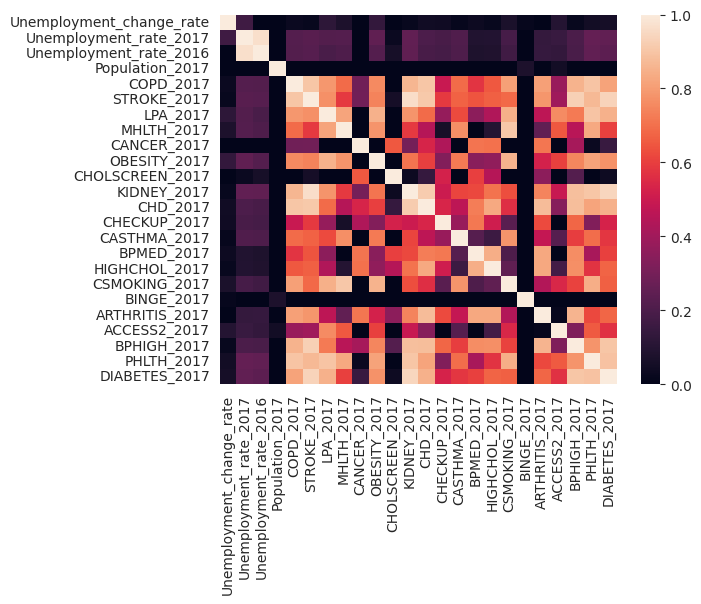

In [37]:
corr_map = training_data[numerical_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);

## The Cardiovascular features are pretty strongly correlated with each other:

In [35]:
cardiovascular_features = [
    'COPD_2017', # Chronic obstructure pulmonary disease
    'STROKE_2017', # Stroke incidence
    'LPA_2017', # Low Physical Activity
    'BPHIGH_2017', # High BP Incidence
    'KIDNEY_2017' # Chronic kidney disease
]

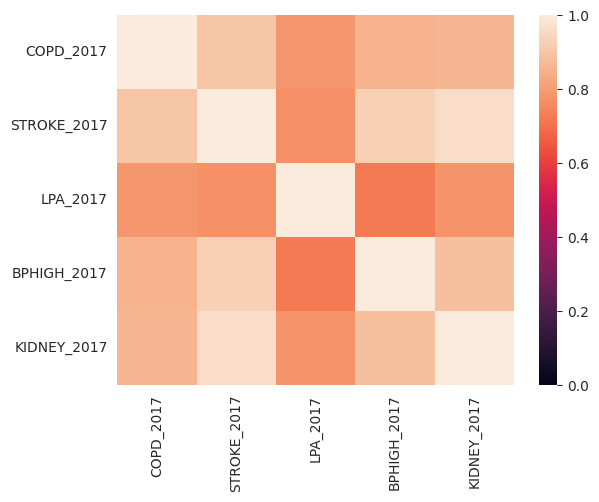

In [36]:
corr_map = training_data[cardiovascular_features].corr()
sns.heatmap(corr_map, vmin=0, vmax=1);